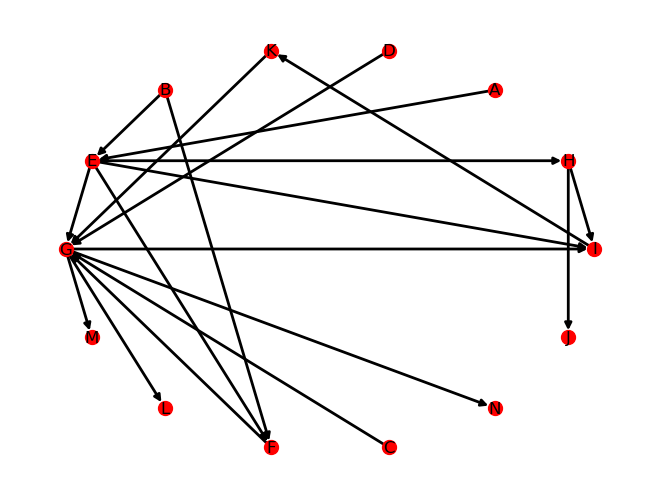

In [66]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path

edges_file = Path("./input/edges1.txt")
source_file = Path("./input/source_nodes1.txt")
target_file = Path("./input/target_nodes1.txt")
output_file = Path("./output/output_file.txt")

def generate_nodes_and_edges(edges_file: Path) -> tuple:
    nodes = set()
    edges = []
    with edges_file.open() as edges_f:
        for i, line in enumerate(edges_f):
            # if the first line is the title, skip it
            if i == 0:
                continue
            line = line.strip()
            endpoints = line.split(" ")
            if len(endpoints) != 3:
                raise ValueError(f"Edge {line} does not contain 2 nodes separated by ' ' and a weight")
            nodes.add(endpoints[0])
            nodes.add(endpoints[1])
            edges.append((endpoints[0], endpoints[1], endpoints[2]))
    return nodes, edges

def generate_graph(nodes, edges) -> nx.DiGraph:
    G = nx.DiGraph()
    G.add_nodes_from(nodes)
    G.add_weighted_edges_from(edges)
    return G

nodes, edges = generate_nodes_and_edges(edges_file)
G = generate_graph(nodes, edges)

options = {
    'node_color': 'red',
    'node_size': 100,
    'width': 2,
    'with_labels': True,
}

nx.draw_circular(G, **options)